In [3]:
file = '/data/ius2019/quasi-static/cnld/cell_0.10dr_patch81.db'
max_number_of_patches = 10

In [4]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from cnld import database

t, ppir = database.read_patch_to_patch_imp_resp(file)
f, ppfr = database.read_patch_to_patch_freq_resp(file)
npatch, _, _ = ppir.shape
nplot = min(npatch, max_number_of_patches)

metadata = database.read_metadata(file)

In [5]:
print(metadata.iloc[0])

freqs                    [0, 50000000.0, 50000.0]
sound_speed                                1500.0
fluid_rho                                  1000.0
array_config    circular_cell_patch81_0.05dr.json
mesh_refn                                       9
format                                    HFormat
aprx                                         paca
basis                                      linear
admis                                           2
eta                                           0.8
eps                                         1e-12
m                                               4
clf                                            16
eps_aca                                    0.0001
rk                                              0
q_reg                                           2
q_sing                                          4
strict                                       True
freq_interp                                     2
Name: 0, dtype: object


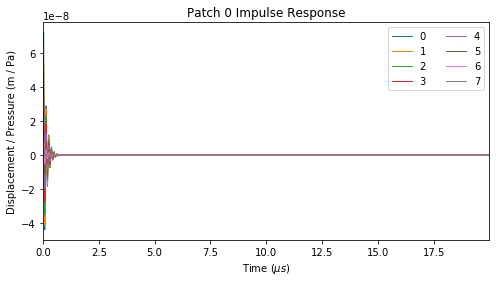

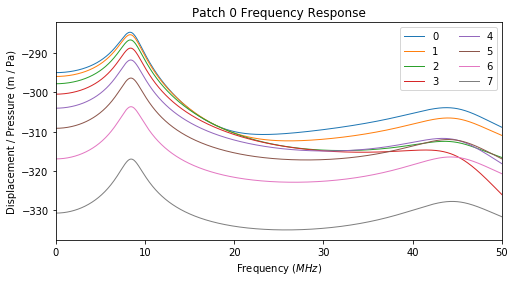

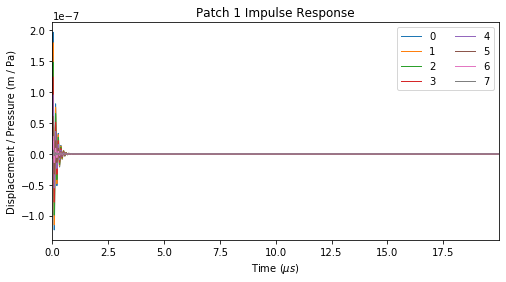

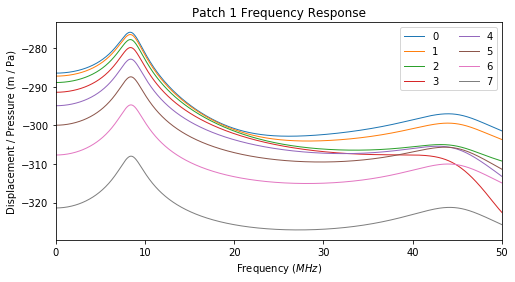

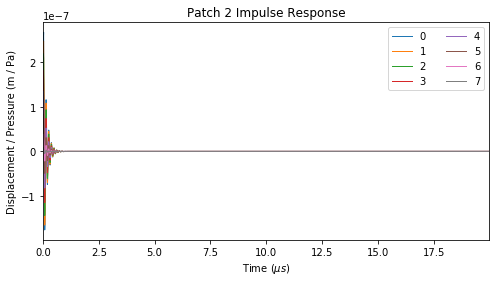

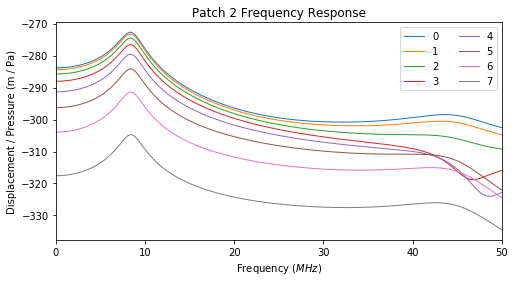

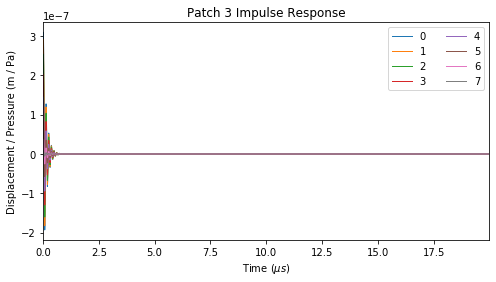

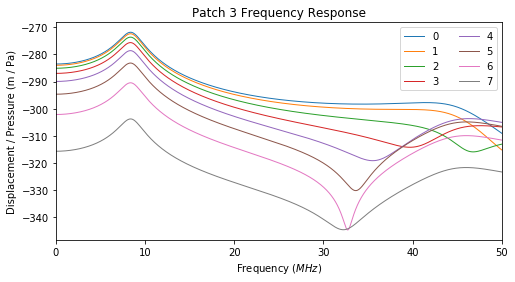

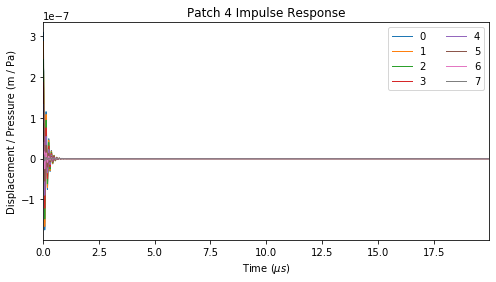

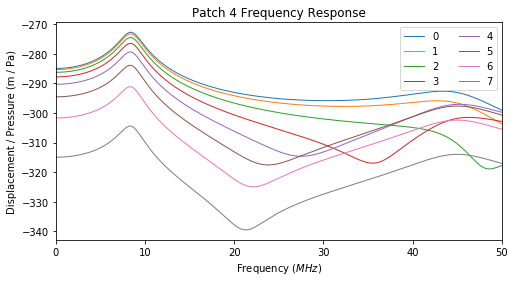

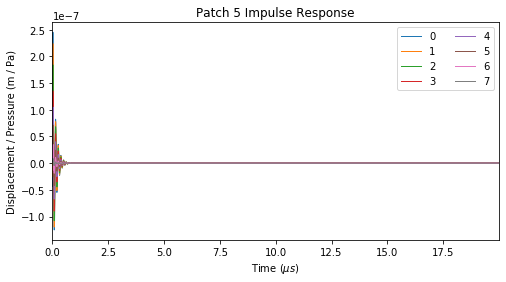

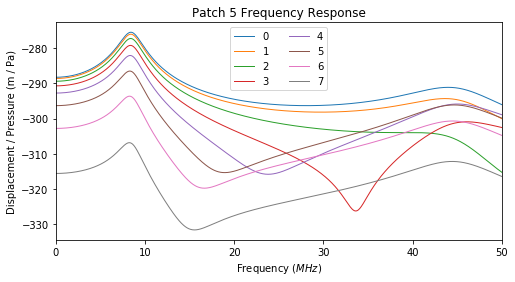

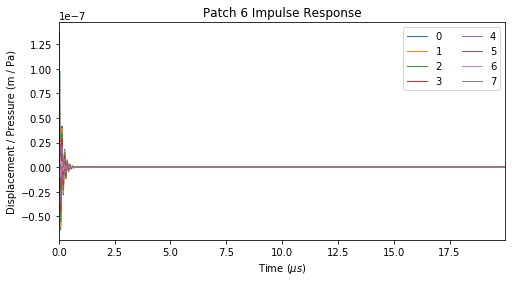

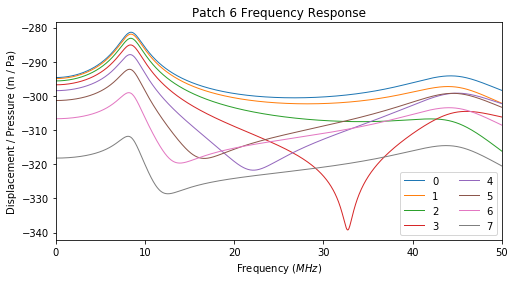

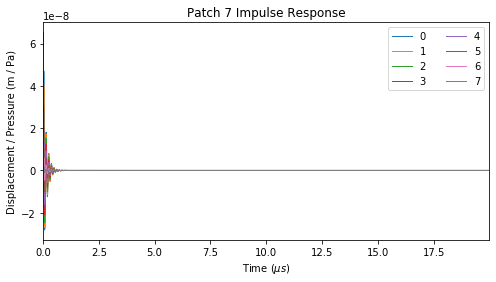

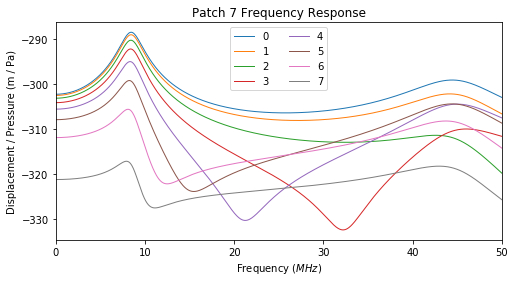

In [6]:
for i in range(nplot):
    fig, ax = plt.subplots(figsize=(8,4))
    ax.plot(t / 1e-6, ppir[i,:nplot,:].T, lw=1)
    ax.set_xlim(t.min() / 1e-6, t.max() / 1e-6 / 2)
    ax.set_xlabel('Time ($\mu s$)')
    ax.set_ylabel('Displacement / Pressure (m / Pa)')
    ax.legend(np.arange(0, nplot), ncol=2)
    ax.set_title('Patch ' + str(i) + ' Impulse Response')
    
    fig, ax = plt.subplots(figsize=(8,4))
    ax.plot(f / 1e6, 20 * np.log10(np.abs(ppfr[i,:nplot,:].T)), lw=1)
    ax.set_xlim(f.min() / 1e-6, f.max() / 1e6)
    ax.set_xlabel('Frequency ($MHz$)')
    ax.set_ylabel('Displacement / Pressure (m / Pa)')
    ax.legend(np.arange(0, nplot), ncol=2)
    ax.set_title('Patch ' + str(i) + ' Frequency Response')